In [ ]:
#logistic regression-- if o/p in the form of discreate.
#                     it classifies the data and produce the o/p in the ways of probability(%form)
#                     based on % we have to say that the model is better or not only based on true/false. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
judge=pd.read_csv(r'C:\Users\Ramesh\Downloads\heart_disease_dataset.csv')

In [ ]:
judge.head()

In [ ]:
judge.shape

In [ ]:
judge.isnull().sum()

In [ ]:
x=judge.loc[:,['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca']]
y=judge.loc[:,'num']


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [8]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 12)
(61, 12)
(242,)
(61,)


In [9]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_predict=reg.predict(x_test)
y_predict

array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [11]:

from sklearn import metrics
%matplotlib inline
cnf_matrix = metrics.confusion_matrix(y_test, y_predict)
cnf_matrix

array([[25,  6],
       [ 4, 26]], dtype=int64)

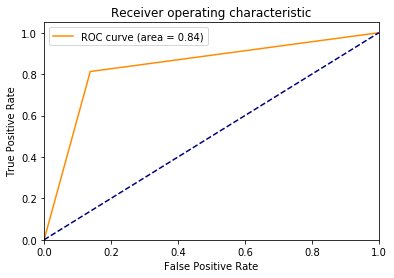

In [19]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_predict, y_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot( [0, 1], [0,1],color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [1]:
ax2 = plt.gca().twinx()
ax2.plot(fpr, thresholds, markeredgecolor='r',linestyle='dashed', color='r')
ax2.set_ylabel('Threshold',color='r')
ax2.set_ylim([thresholds[-1],thresholds[0]])
ax2.set_xlim([fpr[0],fpr[-1]])
 
plt.savefig('roc_and_threshold.png')
plt.close()

NameError: name 'plt' is not defined